<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/Data_Science_Core_W6_Independent_Project_2021_11_Faith_Rotich_Report_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

a) Specifying the Question



Task - A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in the training).

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approah

What to train given:

Rank of home team
Rank of away team
Tournament type
Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)



 

b) Metric for Success

- Concatenating the two datasets for purposes of analysis 

c) Understanding the Context

d) Experimental Design 

e) Data Relevance 
- Data provided is relevant for this project

## 2 Reading the Data

In [194]:
#  Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.linear_model import LinearRegression
import datetime as st

In [195]:
# Creating a function to read the datasets
def data(file):
  csv = pd.read_csv(file)
  return csv

In [196]:
fifa = data('fifa_ranking.csv')

In [197]:
results = data('results.csv')

## 3. Checking the Data

In [198]:
fifa.shape

(57793, 16)

In [199]:
fifa.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [200]:
fifa.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [201]:
# Checking that all the columns have the correct data types 
fifa.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [202]:
# Checking the Results dataset

In [203]:
results.shape

(40839, 9)

In [204]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [205]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [206]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

Validation : Data is valid in comparison to other Datasets from the Fifa Website 

## 5. Data Cleaning Procedures 

In [207]:
fifa.isnull().sum()

# There are no null values in the dataset

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [208]:
fifa.duplicated().any()

# Some values are duplicated but it's allowable since they're football match results 

True

In [209]:
# Checking the statistical description of fifa dataset

fifa.describe()

,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [210]:
results.isnull().sum()
# No null values 

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [211]:
results.duplicated().any()

False

In [212]:
results.describe()
# Checking the statistical summary for the Results dataset

,home_score,away_score
count,40839.000000,40839.000000
mean,1.745709,1.188105
std,1.749145,1.405120
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


## 6. Joining the two datasets for analysis

In [213]:
fifa.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [214]:
results.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [215]:
# Renaming the rank_date column

fifa.rank_date = fifa.rename({'rank_date': 'date'}, axis = 1, inplace = True)

In [216]:
# Making the date columns uniform
#
results.date = results.date.apply(lambda x: x.replace('/', '-'))
fifa.date = fifa.date.apply(lambda x: x.replace('/', '-'))

In [217]:
# Changing the date columns to datetime objects

fifa.date = pd.to_datetime(fifa.date)
results.date = pd.to_datetime(results.date)


In [218]:
# Creating a year and month column from the datetime object
#
fifa['year'] = fifa.date.dt.year
results['year'] = results.date.dt.year

fifa['month'] = fifa.date.dt.month
results['month'] = fifa.date.dt.month

In [219]:
# Checking unique year values

fifa['year'].unique()

array([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018])

In [220]:
# Checking unique year values for results dataset
results['year'].unique()

array([1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019])

In [221]:
# Merging the two dataframes on year and month 

df1 = pd.merge(results, fifa, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])

In [222]:
df1.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [223]:
df1.shape

(4478943, 27)

In [224]:
df1.columns

Index(['date_x', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'year', 'month', 'rank',
       'country_full', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'date_y'],
      dtype='object')

In [226]:
# Selecting the ranking details of the home team only
#
# ht = home_team
ht = df1[df1.home_team == df1.country_full]
#previewing the first five rows of the home_combined dataframe
#
ht.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18192,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18291,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18479,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18747,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18838,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,69.0,Thailand,THA,0.0,25.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AFC,1994-04-19


In [227]:
# Getting the columns to be renamed
#
ht.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [228]:
# Renaming the selected home_combined columns using a for loop
# 
for x, y in zip(ht.columns[11:-2], ht.columns[11:-2]):
  ht.rename(columns = {x: y + '_home'}, inplace = True)
  
# Previewing the renamed columns
ht.columns[11:-2]

Index(['rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home'],
      dtype='object')

In [229]:
# Selecting the ranking details of the away team only
# at = away_team
at = df1[df1.away_team == df1.country_full]
#previewing the first five rows of the away_combined dataframe
#
at.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,date_y
18224,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19
18286,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18532,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18648,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19
18774,1994-01-11,Thailand,Nigeria,1,1,Friendly,Bangkok,Thailand,False,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19


In [230]:
# Getting the columns to be renamed in the away_combined dataframe
#
at.columns[11:-2]

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'],
      dtype='object')

In [231]:
# Renaming the selected away_combined columns using a for loop
# 
for x, y in zip(at.columns[11:-2], at.columns[11:-2]):
  at.rename(columns = {x: y + '_away'}, inplace = True)
  
# Previewing the renamed columns
at.columns[11:-2]

Index(['rank_away', 'country_full_away', 'country_abrv_away',
       'total_points_away', 'previous_points_away', 'rank_change_away',
       'cur_year_avg_away', 'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away'],
      dtype='object')

In [232]:
# Selecting only the relevant columns in the away_combined dataframe
# Creating a list of relevant columns
#
relevant_cols = list(at.columns[9:-2])
relevant_cols.extend(['home_team', 'away_team'])

at = at[relevant_cols]

# Previewing the first two columns of the away_combined dataset
#
at.head()

,year,month,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,home_team,away_team
18224,1994,4,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Barbados,Grenada
18286,1994,4,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ghana,Egypt
18532,1994,4,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mali,Burkina Faso
18648,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Mauritania,Mali
18774,1994,4,5.0,Nigeria,NGA,0.0,49.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thailand,Nigeria


In [233]:
# Merging the home_combined dataframe to the away_combined dataframe
# The two dataframes have been merged on year, month, home_team and away_team columns
#
df = pd.merge(ht, at, how = 'left' , left_on =['year', 'month', 'home_team', 'away_team'],\
                    right_on = ['year', 'month', 'home_team', 'away_team'])
# Previewing the first five rows of the merged dataframe
df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,country_full_home,country_abrv_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,date_y,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,Barbados,BRB,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,1994-04-19,131.0,Grenada,GRN,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,Ghana,GHA,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,24.0,Egypt,EGY,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,101.0,Burkina Faso,BFA,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,Mauritania,MTN,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,1994-04-19,48.0,Mali,MLI,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [234]:
# Removing irrelevant columns from the final dataframe

irrelevant = ['country_full_home', 'country_abrv_home', 'date_y', 'country_full_away',	'country_abrv_away']
df.drop(irrelevant, axis = 1, inplace = True)

In [235]:
# Checking for missing values
# This is because a left join was used and some countries in the result dataframe are not ranked.

df.isnull().sum()

date_x                             0
home_team                          0
away_team                          0
home_score                         0
away_score                         0
tournament                         0
city                               0
country                            0
neutral                            0
year                               0
month                              0
rank_home                          0
total_points_home                  0
previous_points_home               0
rank_change_home                   0
cur_year_avg_home                  0
cur_year_avg_weighted_home         0
last_year_avg_home                 0
last_year_avg_weighted_home        0
two_year_ago_avg_home              0
two_year_ago_weighted_home         0
three_year_ago_avg_home            0
three_year_ago_weighted_home       0
confederation                      0
rank_away                       1811
total_points_away               1811
previous_points_away            1811
r

In [236]:
# Dropping any missing values

df.dropna(inplace=True)

In [237]:
# Creating a copy of the final_df for use later on

copy_df = df.copy()

In [238]:
df.head()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
0,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994-01-02,Barbados,Grenada,0,0,Friendly,Bridgetown,Barbados,False,1994,4,99.0,0.0,13.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,131.0,0.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1994-01-02,Ghana,Egypt,2,1,Friendly,Accra,Ghana,False,1994,4,29.0,0.0,41.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,24.0,0.0,44.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1994-01-05,Mali,Burkina Faso,1,1,Friendly,Bamako,Mali,False,1994,4,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,101.0,0.0,12.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1994-01-09,Mauritania,Mali,1,3,Friendly,Nouakchott,Mauritania,False,1994,4,147.0,0.0,3.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,48.0,0.0,31.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [239]:
df.dtypes

date_x                          datetime64[ns]
home_team                               object
away_team                               object
home_score                               int64
away_score                               int64
tournament                              object
city                                    object
country                                 object
neutral                                   bool
year                                     int64
month                                    int64
rank_home                              float64
total_points_home                      float64
previous_points_home                   float64
rank_change_home                       float64
cur_year_avg_home                      float64
cur_year_avg_weighted_home             float64
last_year_avg_home                     float64
last_year_avg_weighted_home            float64
two_year_ago_avg_home                  float64
two_year_ago_weighted_home             float64
three_year_ag

In [240]:
df.shape

(18767, 36)

In [241]:
df.describe()

,home_score,away_score,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away
count,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000,18767.000000
mean,1.594128,1.057495,2006.569564,6.471306,75.937230,163.338422,440.165716,0.326637,83.666130,83.666130,80.205510,40.102838,78.605210,23.581592,79.940208,15.988099,79.159962,155.535348,427.189055,0.155539,78.741379,78.741379,77.714855,38.857513,75.272922,22.581886,76.773545,15.354785
std,1.611061,1.231080,6.763553,3.448749,50.823977,313.186984,331.307160,6.297103,166.486881,166.486881,162.365856,81.183014,163.354405,49.006289,159.616751,31.923405,52.531008,300.278638,327.708441,6.110710,157.850225,157.850225,158.565490,79.282806,156.353214,46.905942,155.915651,31.183189
min,0.000000,0.000000,1994.000000,1.000000,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2001.000000,3.000000,33.000000,0.000000,167.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.000000,145.500000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2007.000000,6.000000,70.000000,0.000000,413.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,403.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2012.000000,10.000000,112.000000,220.220000,624.000000,2.000000,102.865000,102.865000,84.980000,42.490000,74.770000,22.430000,86.575000,17.315000,117.000000,205.090000,613.000000,2.000000,90.180000,90.180000,79.690000,39.840000,69.590000,20.880000,78.850000,15.770000
max,31.000000,15.000000,2018.000000,12.000000,209.000000,1770.060000,1857.000000,82.000000,1158.660000,1158.660000,1088.300000,544.150000,1158.660000,347.600000,1200.770000,240.150000,209.000000,1770.060000,1871.000000,82.000000,1126.040000,1126.040000,1088.300000,544.150000,1159.710000,347.910000,1200.770000,240.150000


In [242]:
# Changing the df dataframe datatypes to their appriopriate datatype
# creating a list of categorical columns
#
category_cols = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month']

# Using a for loop to change the datatypes to categorical
#
for col in category_cols:
  df[col] = df[col].astype('category')

In [243]:
# Creating a new column showing the final result
df['score'] = df.home_score - df.away_score

In [244]:
# Previewing the first five rows of the score column
#
df.score.head()

0    0
1    0
2    1
3    0
4   -2
Name: score, dtype: int64

In [245]:
# Creating a function to be used to create a win, draw or lose column
#
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe

df['result'] = df.score.apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose

df.drop('score', axis = 1, inplace = True)

# Creating a column of total goals scored

df['total_goals'] = df.home_score + df.away_score

# Previewing the last five rows of the dataframe together with the result column

df.tail()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,total_goals
20572,2018-10-16,Japan,Uruguay,4,3,Friendly,Saitama,Japan,False,2018,6,61.0,520.75,528.0,-1.0,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,14.0,1018.41,976.0,3.0,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,Win,7
20573,2018-10-16,Laos,Mongolia,1,4,Friendly,Vientiane,Laos,False,2018,6,178.0,81.58,80.0,1.0,21.25,21.25,65.52,32.76,63.57,19.07,42.50,8.50,AFC,186.0,51.00,51.0,2.0,8.50,8.50,34.00,17.00,0.00,0.00,127.50,25.50,Lose,5
20575,2018-10-16,Mexico,Chile,0,1,Friendly,Queretaro,Mexico,False,2018,6,15.0,989.44,1008.0,0.0,470.55,470.55,506.78,253.39,579.97,173.99,457.54,91.51,CONCACAF,9.0,1134.66,1146.0,0.0,403.99,403.99,831.33,415.67,724.98,217.49,487.56,97.51,Lose,1
20576,2018-10-16,Oman,Ecuador,0,0,Friendly,Doha,Qatar,True,2018,6,84.0,391.06,383.0,3.0,259.44,259.44,114.64,57.32,192.68,57.80,82.45,16.49,AFC,60.0,523.85,506.0,3.0,67.14,67.14,387.50,193.75,630.02,189.01,369.77,73.95,Draw,0
20577,2018-10-16,Sweden,Slovakia,1,1,Friendly,Stockholm,Sweden,False,2018,6,24.0,879.90,889.0,-1.0,478.44,478.44,431.99,215.99,370.10,111.03,372.19,74.44,UEFA,28.0,804.36,786.0,1.0,332.12,332.12,454.01,227.01,325.92,97.77,737.30,147.46,Draw,2


## 7. Exploratory Data Analysis 

Univariate Analysis

In [246]:
# Creating a user defined function for univariate visuals 
def uni_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2)
  if kind == 'pie':
    df[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize=(7, 6), rot=90)
  elif kind == 'bar':
    df[column].value_counts().plot(kind=kind, figsize=(10, 8), rot=90)
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1)
  return plt.show()

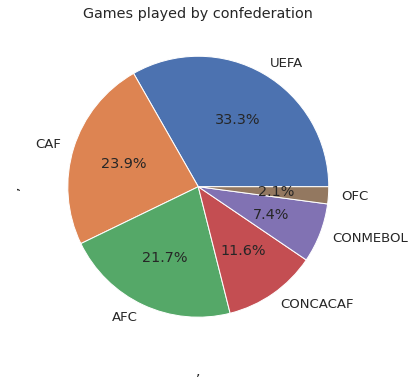

In [247]:
uni_visuals('confederation', 'pie', 'Games played by confederation', ',', ',')

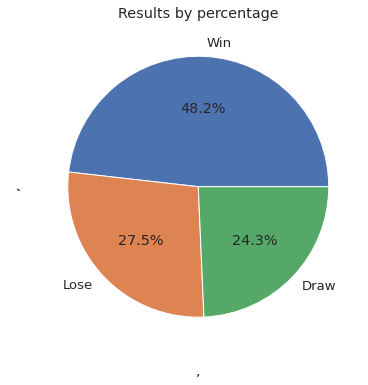

In [248]:
uni_visuals('result', 'pie', 'Results by percentage', ',', ',')

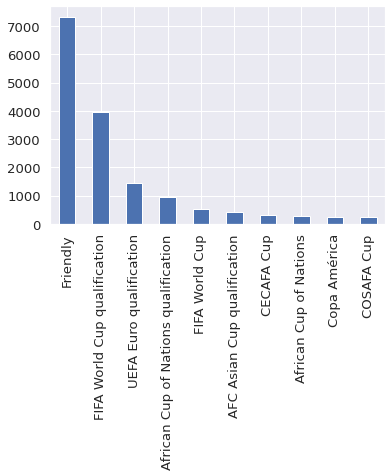

In [249]:
df['tournament'].value_counts().head(10).plot.bar()

In [250]:
df['tournament'].value_counts()

 # Friendly matches make up most of the matches played but they're outliers 

Friendly                                7331
FIFA World Cup qualification            3968
UEFA Euro qualification                 1445
African Cup of Nations qualification     969
FIFA World Cup                           521
                                        ... 
Copa del Pacífico                          4
Dragon Cup                                 4
OSN Cup                                    4
Copa América qualification                 2
SKN Football Festival                      2
Name: tournament, Length: 66, dtype: int64

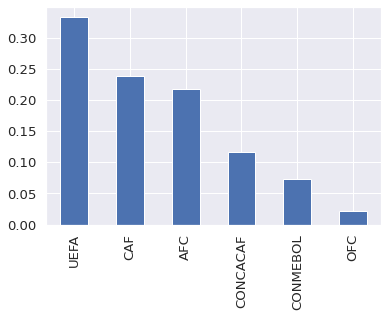

In [251]:

(df['confederation'].value_counts().head(10)/len(df)).plot.bar()

In [253]:
# Checking the datatypes of the df dataframe
#
df.dtypes

date_x                          datetime64[ns]
home_team                             category
away_team                             category
home_score                               int64
away_score                               int64
tournament                            category
city                                  category
country                               category
neutral                               category
year                                  category
month                                 category
rank_home                              float64
total_points_home                      float64
previous_points_home                   float64
rank_change_home                       float64
cur_year_avg_home                      float64
cur_year_avg_weighted_home             float64
last_year_avg_home                     float64
last_year_avg_weighted_home            float64
two_year_ago_avg_home                  float64
two_year_ago_weighted_home             float64
three_year_ag

In [254]:
# Changing the df dataframe datatypes to their appriopriate datatype
# creating a list of categorical columns
#
category = ['home_team', 'away_team', 'tournament', 'city', 'country', 'neutral', 'year', 'month']

# Using a for loop to change the datatypes to categorical
#
for col in category:
  df[col] = df[col].astype('category')

In [255]:
# Creating a new column showing the final result
# The column has been created by subtracting the away score from the home score
#
df['final_score'] = df.home_score - df.away_score

In [256]:
# Previewing the first five rows of the score column
#
df.final_score.head()

0    0
1    0
2    1
3    0
4   -2
Name: final_score, dtype: int64

In [257]:
# Creating a function to be used to create a win, draw or lose column
#
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
#
df['result'] = df.final_score.apply(lambda x: result(x))

# Dropping the score column, as it has served its purpose
#
df.drop('final_score', axis = 1, inplace = True)

# Creating a column of total goals scored
#
df['total_goals'] = df.home_score + df.away_score

# Previewing the last five rows of the dataframe together with the result column
#
df.tail()

,date_x,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,three_year_ago_avg_home,three_year_ago_weighted_home,confederation,rank_away,total_points_away,previous_points_away,rank_change_away,cur_year_avg_away,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,result,total_goals
20572,2018-10-16,Japan,Uruguay,4,3,Friendly,Saitama,Japan,False,2018,6,61.0,520.75,528.0,-1.0,164.51,164.51,413.01,206.50,273.24,81.97,338.88,67.78,AFC,14.0,1018.41,976.0,3.0,486.28,486.28,487.69,243.84,561.47,168.44,599.26,119.85,Win,7
20573,2018-10-16,Laos,Mongolia,1,4,Friendly,Vientiane,Laos,False,2018,6,178.0,81.58,80.0,1.0,21.25,21.25,65.52,32.76,63.57,19.07,42.50,8.50,AFC,186.0,51.00,51.0,2.0,8.50,8.50,34.00,17.00,0.00,0.00,127.50,25.50,Lose,5
20575,2018-10-16,Mexico,Chile,0,1,Friendly,Queretaro,Mexico,False,2018,6,15.0,989.44,1008.0,0.0,470.55,470.55,506.78,253.39,579.97,173.99,457.54,91.51,CONCACAF,9.0,1134.66,1146.0,0.0,403.99,403.99,831.33,415.67,724.98,217.49,487.56,97.51,Lose,1
20576,2018-10-16,Oman,Ecuador,0,0,Friendly,Doha,Qatar,True,2018,6,84.0,391.06,383.0,3.0,259.44,259.44,114.64,57.32,192.68,57.80,82.45,16.49,AFC,60.0,523.85,506.0,3.0,67.14,67.14,387.50,193.75,630.02,189.01,369.77,73.95,Draw,0
20577,2018-10-16,Sweden,Slovakia,1,1,Friendly,Stockholm,Sweden,False,2018,6,24.0,879.90,889.0,-1.0,478.44,478.44,431.99,215.99,370.10,111.03,372.19,74.44,UEFA,28.0,804.36,786.0,1.0,332.12,332.12,454.01,227.01,325.92,97.77,737.30,147.46,Draw,2


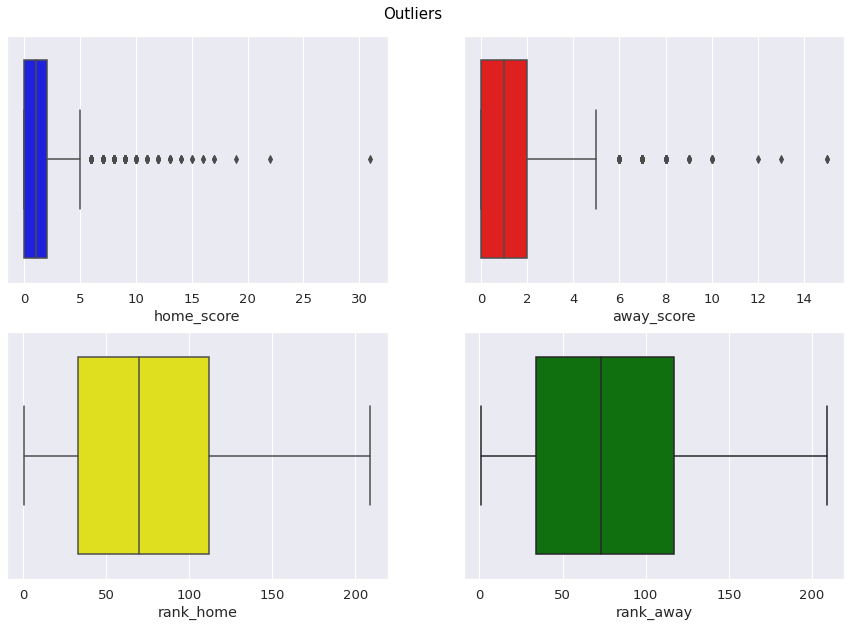

In [258]:
# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['home_score', 'away_score', 'rank_home', 'rank_away']
colors = ['blue', 'red', 'yellow', 'green']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Outliers', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)

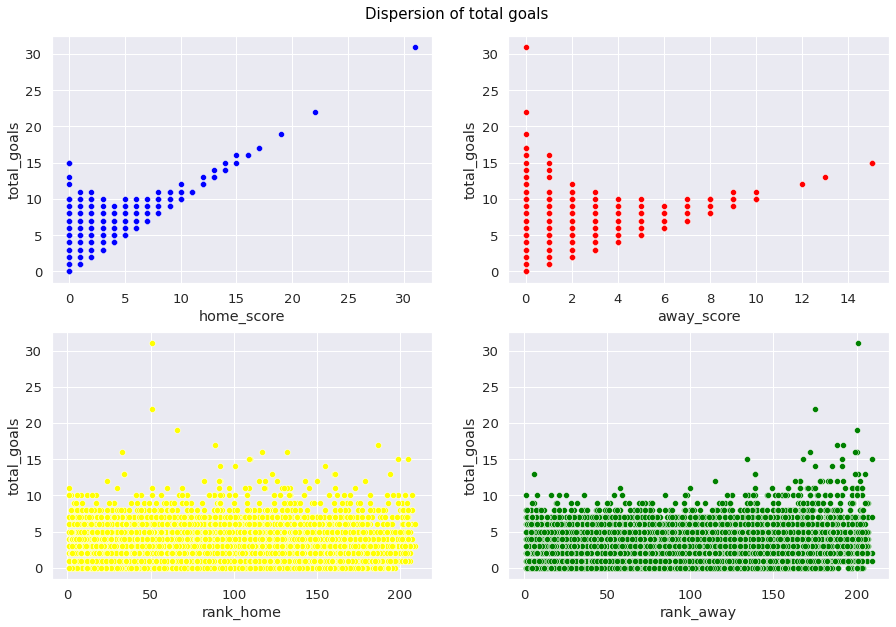

In [259]:
# Plotting scatter plots to show dispersion of total goals
# Setting the figure size to 15 by 10
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Dispersion of total goals', fontsize = 15, y = 0.92, color = 'black')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.scatterplot(df[column], df.total_goals, ax = ax, color = color)


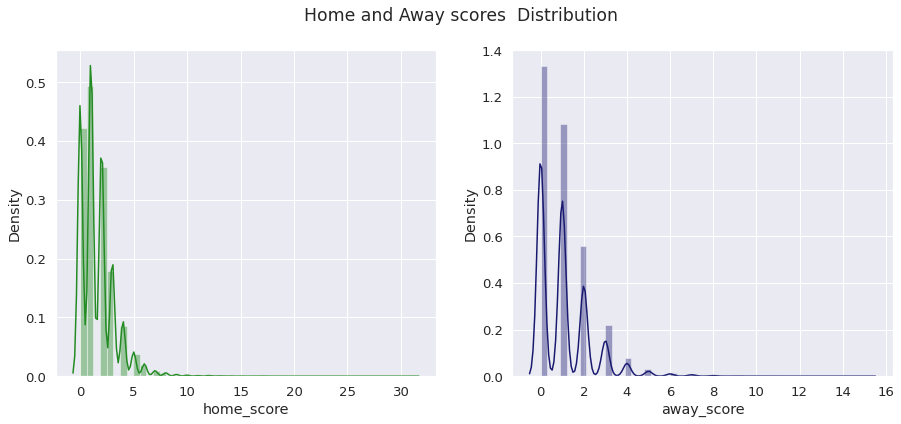

In [260]:
# Using displots to plot distribution of home and away scores
#
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 6))
plt.suptitle('Home and Away scores  Distribution')
for ax, data, column, color in zip(axes.flatten(), df, ['home_score', 'away_score'], ['forestgreen', 'midnightblue']):
  sns.distplot(df[column], ax = ax, hist = True, color = color)

# POLYNOMIAL REGRESSION

In [261]:
# Selecting columns relevant to the reasearch question
#
dataset = df[['home_team',	'away_team',	'home_score',	'away_score',	'tournament', 'rank_home', 'rank_away']]

# Previewing the first five rows of the dataset
#
dataset.head()

,home_team,away_team,home_score,away_score,tournament,rank_home,rank_away
0,Barbados,Grenada,0,0,Friendly,99.0,131.0
1,Barbados,Grenada,0,0,Friendly,99.0,131.0
2,Ghana,Egypt,2,1,Friendly,29.0,24.0
3,Mali,Burkina Faso,1,1,Friendly,48.0,101.0
4,Mauritania,Mali,1,3,Friendly,147.0,48.0


Checking for multicollinearity

In [262]:
# Displaying the correlations between the variables
#
correlation = dataset.drop('home_score', axis = 1).corr()
correlation

,away_score,rank_home,rank_away
away_score,1.000000,0.212876,-0.184720
rank_home,0.212876,1.000000,0.481618
rank_away,-0.184720,0.481618,1.000000


The talbe above shows how each variable relates to another.

The coefficient of 1 across the diagonal is accurate since a variable is perfectly correlated to itself.

The correlations are used to compute the Variance Inflation Factor score for each variable.


In [263]:
# Creating a dataframe of the VIF using an inverse of the correlations
#
vif = pd.DataFrame(np.linalg.inv(corrs.values), index = corrs.index, columns = corrs.columns)
vif

,away_score,rank_home,rank_away
away_score,1.180281,-0.463849,0.441420
rank_home,-0.463849,1.484301,-0.800548
rank_away,0.441420,-0.800548,1.467098


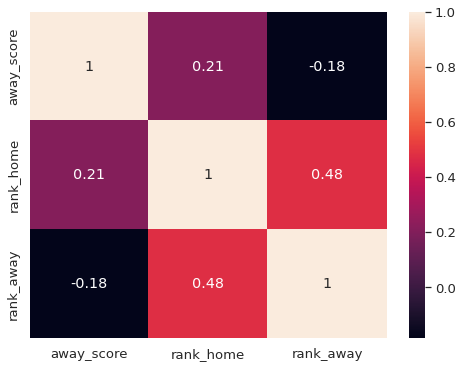

In [264]:
# Creating a heatmap of the correlation
#
plt.figure(figsize = (8, 6))
sns.heatmap(correlation, annot = True)
plt.show()

In [265]:
import scipy as sp
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, confusion_matrix
import requests
from io import StringIO
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [266]:
# Creating the polynomial model
# Creating X and y variables
#
X = dataset.iloc[:, [0, 1, 3, 4, 5, 6]]
y = dataset.home_score


In [267]:
# Encoding categorical variables
#
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting the dataset into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [268]:
print(X_train.shape)

(15013, 480)


In [269]:
print(X_test.shape)

(3754, 480)


In [270]:
print(y_train.shape)

(15013,)


In [271]:
print(y_test.shape)

(3754,)


In [272]:
# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [273]:
# Standardising the X_train and the X_test to the same scale
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [274]:
# Fitting the polynomial features to the X_train and X_test
#
poly_features = PolynomialFeatures(degree = 1)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [ ]:
# Making predictions
#
y_pred = regressor.predict(X_test)

In [ ]:
print(y_pred)

[0.05932617 2.4765625  2.28417969 ... 1.77099609 1.66357422 2.66943359]


In [ ]:
# Measuring the accuracy of the model using the mean squared error
#
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.3325836606051844


In [ ]:
# Hyperparameter tuning to find the optimal parameters for the model
# Tuning the parameters of the linear regression model to find the optimal 
# Printing the Linear Regression model parameters that can be tuned
#
from sklearn.linear_model import LinearRegression
LinearRegression()

LinearRegression()

In [ ]:
regressor.coef_

array([ 1.07068042e-18,  9.85407224e-02, -3.02515511e-01,  3.18441966e-01,
        1.05652702e-01,  1.39301856e-01, -1.14190486e-01,  6.72190371e-02,
        9.61078784e-02, -3.78084893e-02,  1.09661229e-02,  2.33042966e-01,
        9.56391589e-02, -1.85390368e-02,  1.93748237e-01,  1.56819125e-01,
        9.45992315e-02, -1.46993023e-02,  1.26885827e-01, -3.65318491e-02,
        1.71455047e-02,  1.04625184e-01,  1.87366552e-01,  3.21146775e-02,
        7.36470900e-02,  3.60154527e-02, -1.83660377e-02,  1.53984611e-01,
        1.21317528e-01,  8.71657935e-02,  2.96950386e-01, -6.09824649e-02,
        1.29677916e-01,  1.20322453e-01,  4.45080243e-02, -7.44427857e-03,
        1.02846019e-01,  9.44569703e-02, -8.46665958e-04,  5.43279282e-02,
        5.78353477e-02,  1.83776103e-01,  1.74317455e-01, -1.60523640e-03,
        1.68625484e-01,  2.59516393e-02,  7.54170316e-02, -7.10851367e-02,
        1.59245269e-01,  1.51978790e-01,  5.77173433e-02,  1.43844796e-02,
        1.20060665e-01,  

In [ ]:
regressor.intercept_

1.6019893428063943

In [277]:
# The parameters that can be tuned are fitting the intercept and normalizing
# Creating a parameters dictionary
#
params = {'normalize': [True, False],
         'fit_intercept': [True, False]}

# Creating a cross validation of 5 folds
#
kfold = KFold(n_splits = 5)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=regressor, param_grid = params, cv = kfold, scoring = 'neg_mean_squared_error')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score {grid_search.best_score_}  best parameters are {grid_search.best_params_}')

Best score -1.927889172018761  best parameters are {'fit_intercept': True, 'normalize': False}


# LOGISTIC REGRESSION

In [ ]:
# Selecting the relevant features for the logistic regression model
#
df2 = df[['home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'year', 'rank_home', 'rank_away', 'result']]

# Previewing the first five rows of the data
#
df2.head()

,home_team,away_team,home_score,away_score,tournament,year,rank_home,rank_away,result
0,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,Draw
1,Barbados,Grenada,0,0,Friendly,1994,99.0,131.0,Draw
2,Ghana,Egypt,2,1,Friendly,1994,29.0,24.0,Win
3,Mali,Burkina Faso,1,1,Friendly,1994,48.0,101.0,Draw
4,Mauritania,Mali,1,3,Friendly,1994,147.0,48.0,Lose


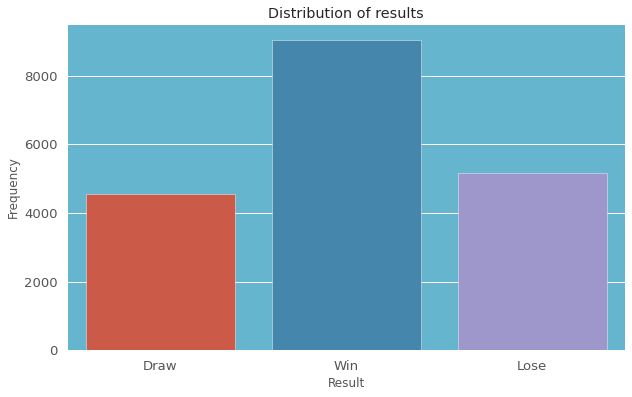

In [ ]:
# Plotting the results
plt.figure(figsize = (10, 6))
ax = sns.countplot(df2.result)
ax.set_facecolor('c')
plt.ylabel('Frequency')
plt.xlabel('Result')
plt.title('Distribution of results')
plt.show()

In [ ]:
# Spliting the data into features and the target variable

X = df2.drop('result', axis = 1)
y = df2.result

# result is set as the target variable 

In [ ]:

# Encoding the categorical features

X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
print(X_train.shape)

(15013, 457)


In [ ]:
print(X_test.shape)

(3754, 480)


In [ ]:
print(y_train.shape)

(15013,)


In [ ]:
print(y_test.shape)

(3754,)


In [ ]:
# Fitting the model
# 
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Using our model to make a prediction
#
y_pred = LogReg.predict(X_test)

In [ ]:
# Evaluating the model
#
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 886,    0,    0],
       [   0, 1047,    0],
       [   0,    0, 1821]])

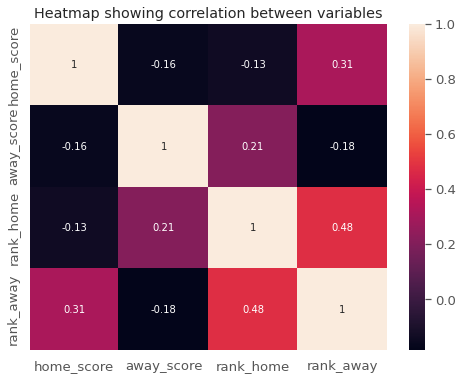

In [ ]:
# Checking for correlations between the variables
#
plt.figure(figsize = (8, 6))
sns.heatmap(df2.corr(), annot = True) 
plt.title('Heatmap showing correlation between variables')
plt.show()

In [ ]:
# Measuring the accuracy of the model

print(f'Model  Accuracy {accuracy_score(y_test, y_pred)}')



Model  Accuracy 1.0


Hyperparameter Tuning

In [ ]:
# Displaying parameters of the logistic regression model that can be tuned
#
LogisticRegression()

LogisticRegression()

In [ ]:
# Creating a dictioanry of parameters to be tuned
#
params = {'C': [1.0, 5.0],
         'penalty': ['l1', 'l2']} # Ridge and Lasso Regression

logistic = LogisticRegression()

# Creating a cross validation of 10 folds
#
kfold = KFold(n_splits = 10)

# Using grid search to find the optimal parameters
#
grid_search = GridSearchCV(estimator=logistic, param_grid = params, cv = kfold, scoring = 'accuracy')

# Fitting the grid search 
#
grid_search_results = grid_search.fit(X, y)

# Displaying the best parameters and the the best score
#
print(f'Best score is {grid_search.best_score_} and the best parameters are {grid_search.best_params_}')

Best score is 1.0 and the best parameters are {'C': 1.0, 'penalty': 'l2'}


Model Accuracy is at 100% and the Ridge (l2) the best parameter